In [46]:
%load_ext autoreload
%autoreload 2

from collections import Counter
import matplotlib.pyplot as plt

from parsing import Book

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
file_paths = [
    "data/cantillation/genesis.txt",
    "data/cantillation/exodus.txt",
    "data/cantillation/leviticus.txt",
    "data/cantillation/numbers.txt",
    "data/cantillation/deuteronomy.txt"
]
books = [Book.from_text_file(file_path) for file_path in file_paths]

100%|██████████| 1068/1068 [00:00<00:00, 10130.60it/s]


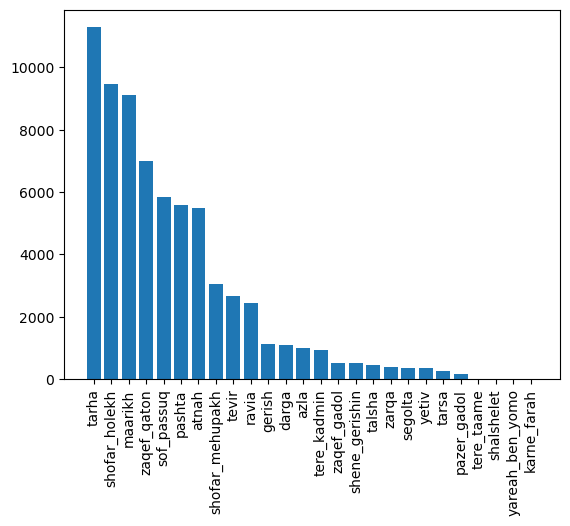

In [51]:
taamim = [taam.name for book in books for taam in book.taamim]
taamim_sorted_counts = Counter(taamim).most_common()
x, y = zip(*taamim_sorted_counts)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(sum(len(book.verses) for book in books))

5853


In [ ]:
# verses_without_sof_passuq = []
# for book in books:
#     print(book.name)
#     for verse in book.verses:
#         if verse.count_taam("sof_passuq") == 0:
#             print(verse)


In [60]:
genesis = books[0]
verses = genesis.find_verses_with_taam_sequence(["paseq", "shofar_holekh", "paseq"])

100%|██████████| 1533/1533 [00:00<00:00, 50515.52it/s]


In [61]:
len(verses) / len(genesis.verses)

0.001304631441617743

In [63]:
for verse in verses: print(verse)

‪   וַיִּ֜מַח אֶת־כָּל־הַיְק֣וּם׀  אֲשֶׁ֣ר׀  עַל־פְּנֵ֣י הָאֲדָמָ֗ה מֵאָדָ֤ם עַד־בְּהֵמָה֨ עַד־רֶ֨מֶשׂ֨ וְעַד־ע֣וֹף הַשָּׁמַ֔יִם וַיִּמָּח֖וּ מִן־הָאָ֑רֶץ וַיִשָּׁ֧אֶר אַךְ־נֹ֛חַ וַאֲשֶׁ֥ר אִתּ֖וֹ בַּתֵּבָה׃‬
‪   וַיֵּצֵ֨א ל֜וֹט וַיְדַבֵּ֣ר׀  אֶל־חֲתָנָ֣יו׀  לֹקְחֵ֣י בְנֹתָ֗יו וַיֹּ֨אמֶר֨ ק֤וּמוּ צְּאוּ֨ מִן־הַמָּק֣וֹם הַזֶּ֔ה כִּי־מַשְׁחִ֥ית יְהוָ֖ה אֶת־הָעִ֑יר וַיְהִ֥י כִמְצַחֵ֖ק בְּעֵינֵ֥י חֲתָנָיו׃‬


100%|██████████| 1533/1533 [00:00<00:00, 73617.14it/s]

516


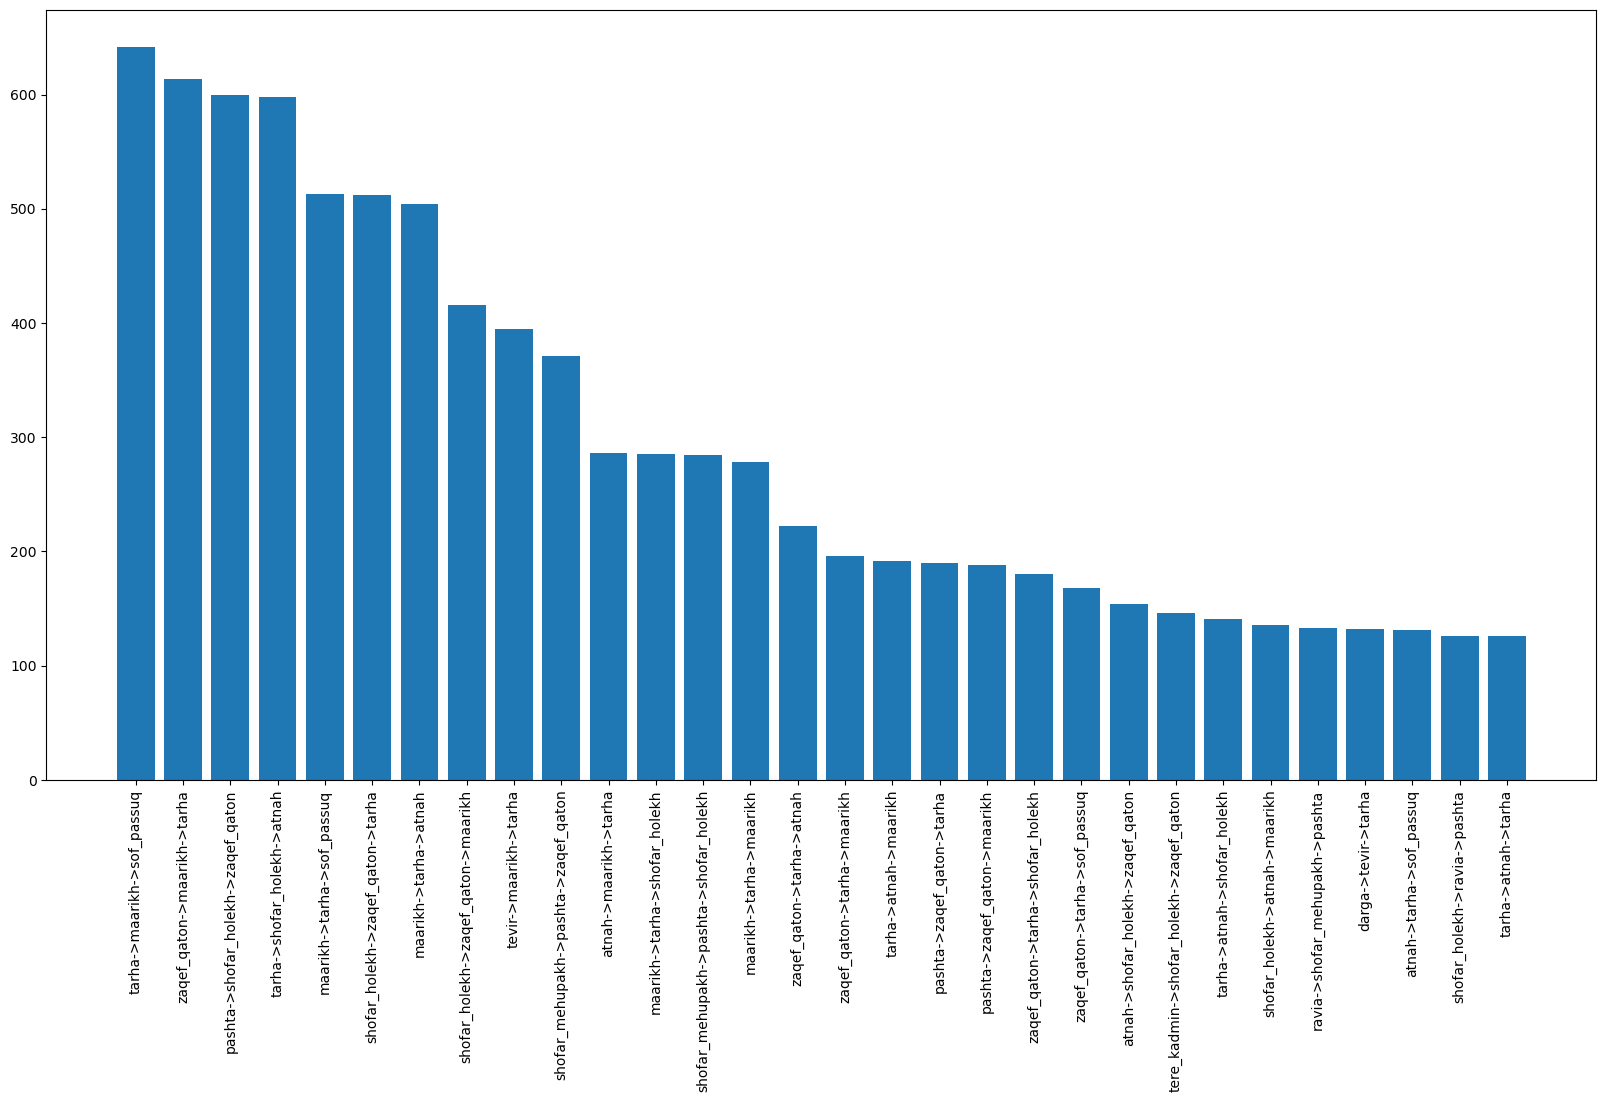

In [64]:
seqeuences = genesis.count_n_taam_sequences(3)
print(len(seqeuences))
sorted_counts = sorted(seqeuences.items(), key=lambda x: x[1], reverse=True)
x, y = zip(*sorted_counts)
x = ["->".join(seq) for seq in x]
plt.figure(figsize=(20, 10))
plt.bar(x[:30], y[:30])
plt.xticks(rotation=90)
plt.show()